#### Regression

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
#Load California Housing dataset
data = fetch_california_housing()
X =pd.DataFrame(data.data, columns=data.feature_names)
y =data.target

# Check for missing values
print("Missing values:\n",X.isnull().sum())

# Display basic info
print("\nDataset Info:")
print(X.info())
print("\nFrist 5rows of features:\n",X.head())

Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Frist 5rows of features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574

In [32]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size =0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [34]:
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)


In [35]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [36]:
y_pred =dt_regressor.predict(X_test)

In [37]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score:{r2:.4f}")

Mean Squared Error: 0.5245
R-squared Score:0.5997


In [42]:
param_grid ={
    'max_depth':[3,5,7,10],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,5,7, 10] 
}

In [43]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')


In [45]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='neg_mean_squared_error')

In [46]:
print("Best Parameters:",grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [50]:
y_pred_best=best_model.predict(X_test)
print(f"Best Model MSE:{mean_squared_error(y_test,y_pred_best):.4f}")
print(f"Best Model  R²: {r2_score(y_test,y_pred_best):.4f}")

Best Model MSE:0.3855
Best Model  R²: 0.7058


In [51]:
best_model.feature_importances_

array([0.62229445, 0.04560302, 0.03596597, 0.01002295, 0.00997183,
       0.13257968, 0.07787322, 0.06568888])

In [52]:
feature_importance =pd.DataFrame({
    'Feature':X.columns,
    'Importance':best_model.feature_importances_
}).sort_values(by='Importance',ascending=False)

print("\nFeature Importance:\n",feature_importance)


Feature Importance:
       Feature  Importance
0      MedInc    0.622294
5    AveOccup    0.132580
6    Latitude    0.077873
7   Longitude    0.065689
1    HouseAge    0.045603
2    AveRooms    0.035966
3   AveBedrms    0.010023
4  Population    0.009972


#### Classification

In [55]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [57]:
data= pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')



In [58]:
df = data.copy()

In [59]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [63]:
df.duplicated().sum()

np.int64(240)

In [64]:
df= df.drop_duplicates()

In [65]:
df.shape

(1359, 12)

In [66]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [67]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [68]:
X= df.iloc[:, :11]


In [69]:
y = df.quality


In [70]:
from sklearn.model_selection import train_test_split


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)


In [72]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((1019, 11), (340, 11), (1019,), (340,))

In [73]:
from sklearn.tree import DecisionTreeClassifier


In [74]:
dt = DecisionTreeClassifier()


In [75]:
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [76]:
dt.score(x_test,y_test)


0.49411764705882355

In [77]:

from sklearn import tree
import matplotlib.pyplot as plt



[Text(0.6084521787934607, 0.975, 'x[10] <= 10.525\ngini = 0.65\nsamples = 1019\nvalue = [7, 43, 423, 408, 126, 12]'),
 Text(0.3782379691457518, 0.925, 'x[6] <= 98.5\ngini = 0.552\nsamples = 630\nvalue = [4, 27, 362, 213, 22, 2]'),
 Text(0.49334507396960625, 0.95, 'True  '),
 Text(0.1909682247294497, 0.875, 'x[1] <= 0.405\ngini = 0.577\nsamples = 553\nvalue = [4, 26, 292, 207, 22, 2]'),
 Text(0.04035229104305779, 0.825, 'x[9] <= 0.585\ngini = 0.572\nsamples = 121\nvalue = [0, 1, 39, 68, 11, 2]'),
 Text(0.018420446695832374, 0.775, 'x[8] <= 3.35\ngini = 0.492\nsamples = 39\nvalue = [0, 1, 24, 14, 0, 0]'),
 Text(0.007368178678332949, 0.725, 'x[6] <= 11.5\ngini = 0.368\nsamples = 22\nvalue = [0, 1, 17, 4, 0, 0]'),
 Text(0.0036840893391664746, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.011052268017499424, 0.675, 'x[4] <= 0.058\ngini = 0.265\nsamples = 20\nvalue = [0, 1, 17, 2, 0, 0]'),
 Text(0.007368178678332949, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0,

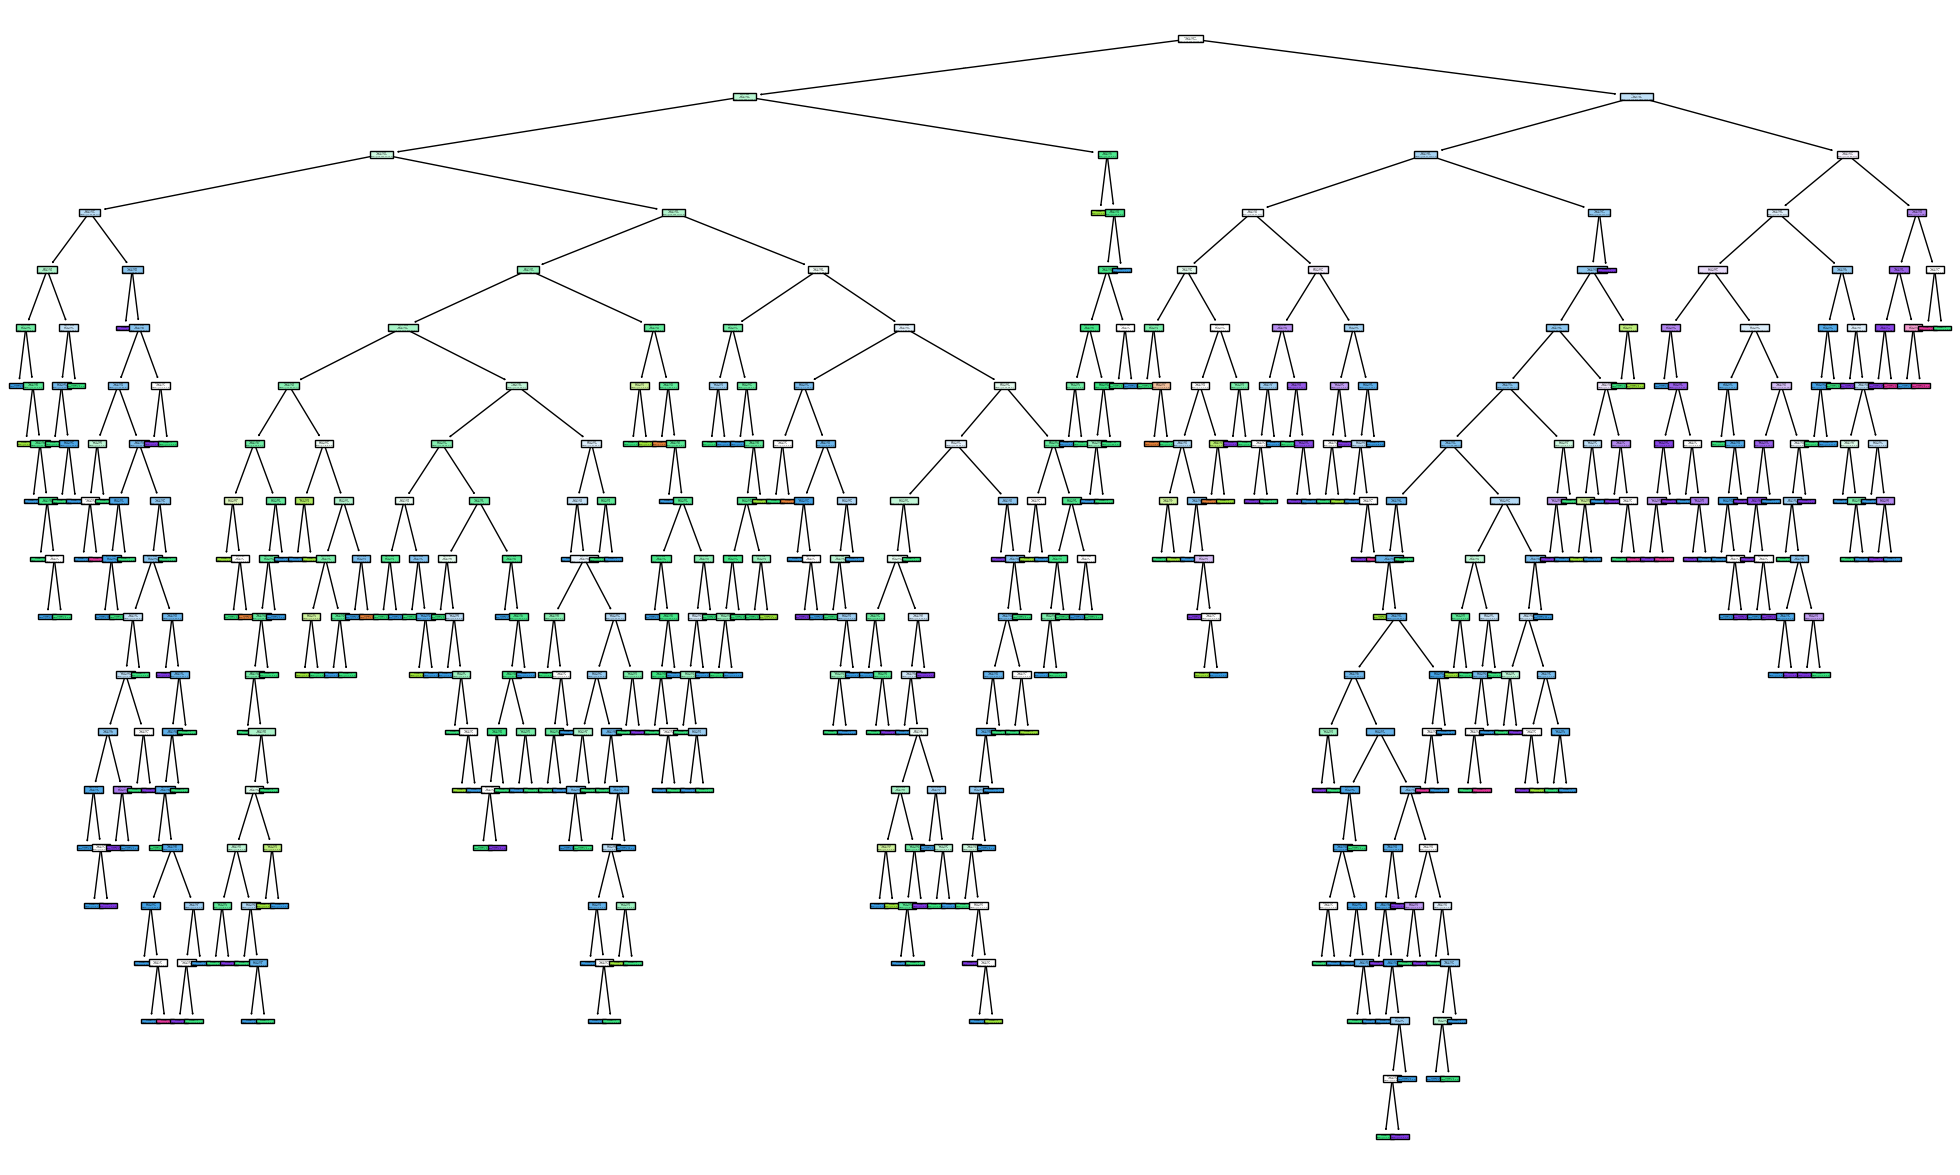

In [78]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt, filled = True)             

[Text(0.4869791666666667, 0.9166666666666666, 'x[10] <= 10.525\ngini = 0.65\nsamples = 1019\nvalue = [7, 43, 423, 408, 126, 12]'),
 Text(0.2708333333333333, 0.75, 'x[6] <= 98.5\ngini = 0.552\nsamples = 630\nvalue = [4, 27, 362, 213, 22, 2]'),
 Text(0.37890625, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'x[1] <= 0.405\ngini = 0.577\nsamples = 553\nvalue = [4, 26, 292, 207, 22, 2]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[9] <= 0.585\ngini = 0.572\nsamples = 121\nvalue = [0, 1, 39, 68, 11, 2]'),
 Text(0.041666666666666664, 0.25, 'x[8] <= 3.35\ngini = 0.492\nsamples = 39\nvalue = [0, 1, 24, 14, 0, 0]'),
 Text(0.020833333333333332, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.25, 'x[7] <= 0.996\ngini = 0.514\nsamples = 82\nvalue = [0, 0, 15, 54, 11, 2]'),
 Text(0.10416666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14583333333333334, 0.08333333333333333, '\n  (...)  \n')

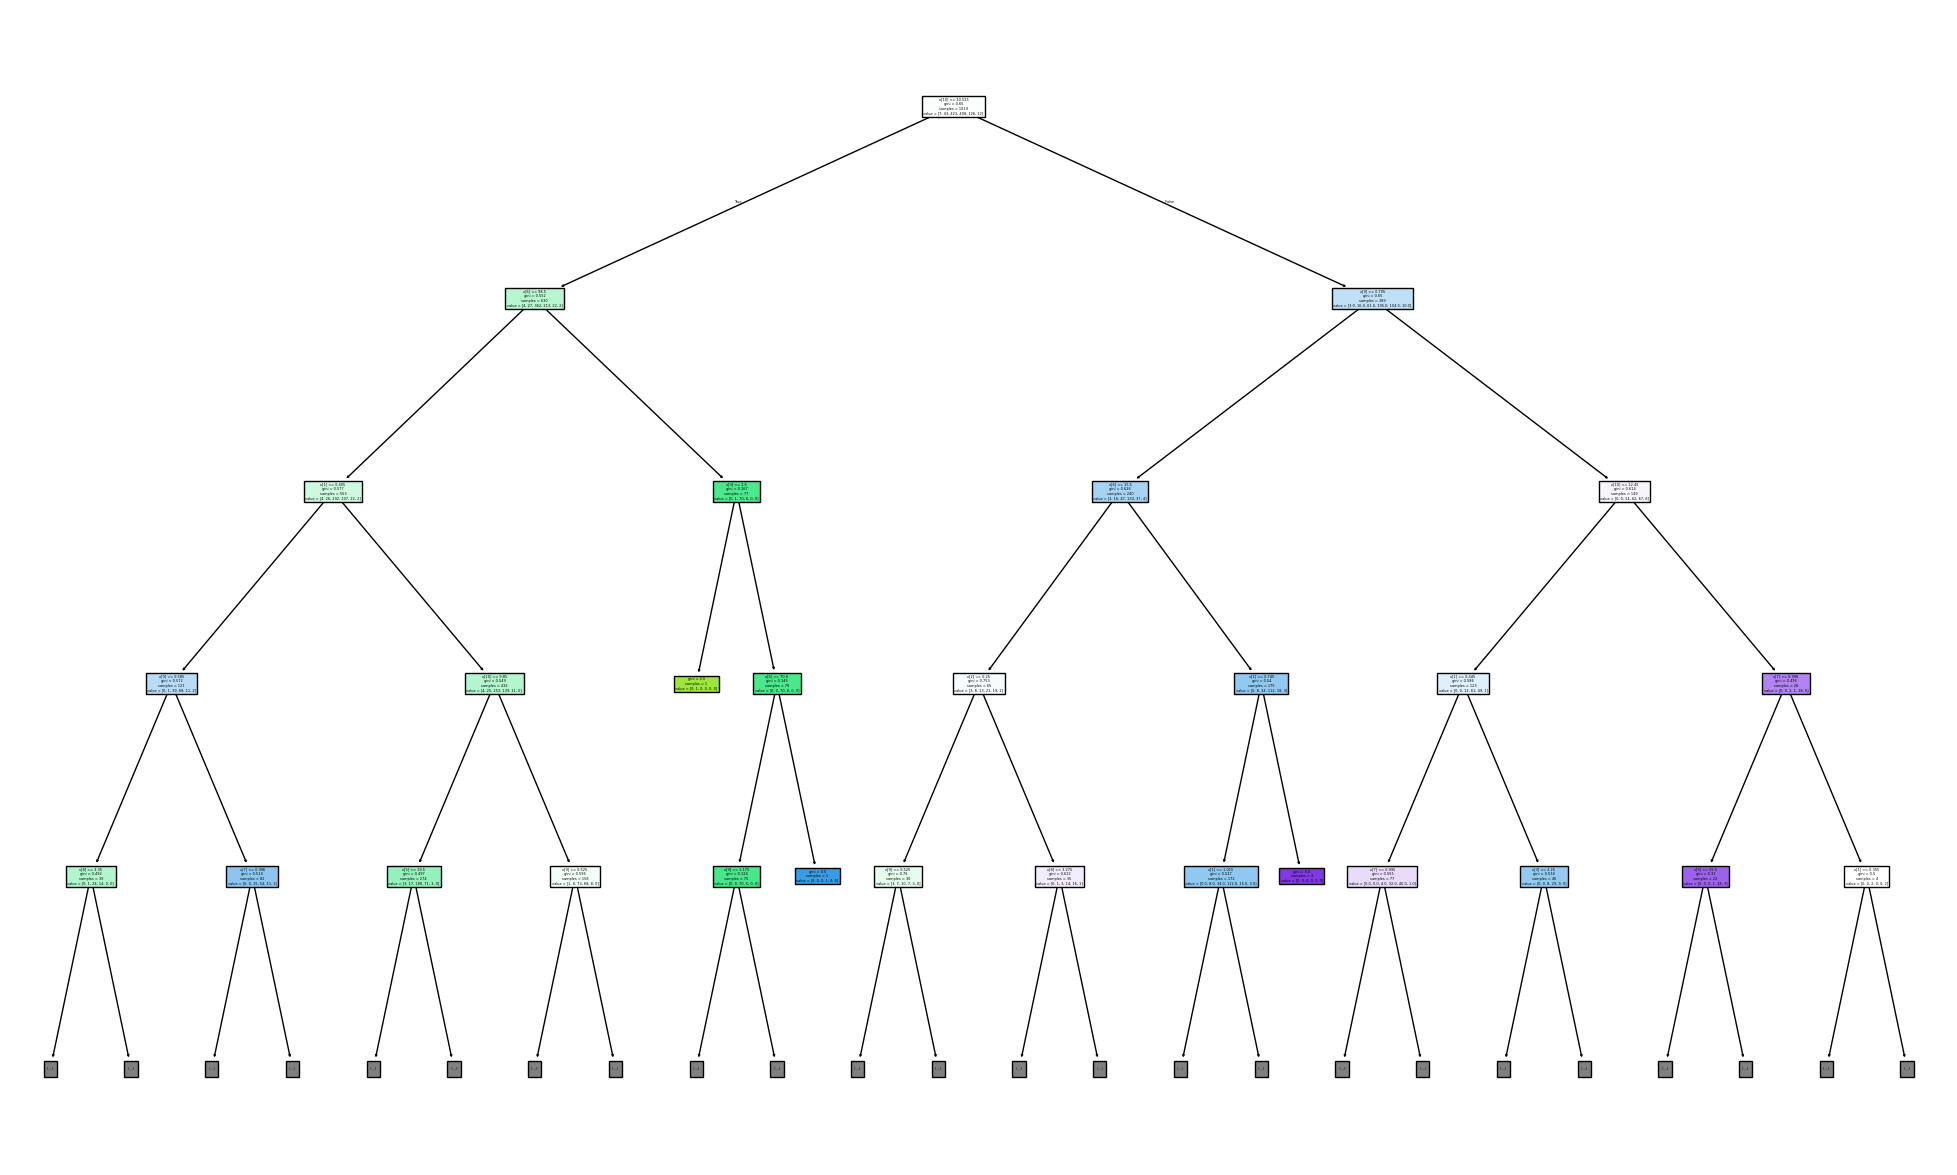

In [79]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt,max_depth=4,filled=True)

In [80]:
y_predict=dt.predict(x_test)

In [81]:
y_predict

array([5, 6, 4, 6, 5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 8, 5, 5, 6, 5, 6,
       7, 4, 4, 6, 6, 6, 5, 7, 7, 6, 6, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 4, 5, 7, 5, 5, 5, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 8, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5, 7, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 7, 5, 6,
       5, 6, 4, 5, 4, 7, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 8, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 7, 8, 5, 5, 6, 6, 5, 5, 7,
       5, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6,
       5, 7, 5, 6, 7, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 4, 6, 5, 6, 6, 6, 7, 5, 6, 7, 8, 5, 5, 5, 5, 8, 6, 5, 6,
       4, 6, 4, 5, 7, 5, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6, 7, 7, 7, 5, 6, 7,
       6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 7, 5, 7, 6, 5,

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test,y_predict)


0.49411764705882355

In [86]:
grid_param = {
             'criterion': ['gini', 'entropy'],
             'max_depth' : range(2,10,1),  
             'min_samples_leaf' : range(1,8,1),
             'min_samples_split': range(2,8,1),
             'splitter' : ['best', 'random']
}

In [87]:
from sklearn.model_selection import GridSearchCV


In [88]:
grid_search = GridSearchCV(estimator=dt, param_grid= grid_param, cv = 5, verbose=1)


In [89]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 1344 candidates, totalling 6720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [90]:
grid_search.best_params_



{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'random'}

In [91]:
best_model = grid_search.best_estimator_


In [93]:
y_predh = best_model.predict(x_test)


In [94]:
accuracy_score(y_test,y_predh)


0.5735294117647058